In [4]:
!pip install catboost

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.8/102.5 MB 2.8 MB/s eta 0:00:37
    --------------------------------------- 1.6/102.5 MB 3.1 MB/s eta 0:00:33
    --------------------------------------- 2.4/102.5 MB 3.3 MB/s eta 0:00:31
   - -------------------------------------- 3.1/102.5 MB 3.6 MB/s eta 0:00:28
   - -------------------------------------- 4.2/102.5 MB 3.8 MB/s eta 0:00:26
   -- ------------------------------------- 5.5/102.5 MB 4.2 MB/s eta 0:00:24
   -- ------------------------------------- 6.8/102.5 MB 4.6 MB/s eta 0:00:21
   -- ------------------------------------- 7.3/102.5 MB 4.7 MB/s eta 0:00:21
   --- ------------------------------------ 8.9/102.5 MB 4.7 MB/s eta 0:00:20
   ---- ----------------------------------- 11.0/102.5 MB 5.2 MB/s eta 0:00:18
   ----- ---------------------------------- 13.4/102.5 MB 5.8 MB/s eta 0:00:1

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('data/StudentsPerformance.csv')


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X=df.drop(['math score'],axis=1)

In [8]:
Y=df['math score']
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [13]:
cat_fea=X.select_dtypes(include=['object']).columns.tolist()
num_fea=X.select_dtypes(exclude=['object']).columns.tolist()

In [15]:
numeric_feature=StandardScaler()
categorical_fea=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",categorical_fea,cat_fea),
        ("StandardScaler",numeric_feature,num_fea)
    ]
)

In [16]:
X=preprocessor.fit_transform(X)

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [21]:
def evaluate_model(true, pred):
    r2 = r2_score(true, pred)
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

In [28]:
models={
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=0)
}
model_list=[]
r2_list=[]
for i in range (len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    model_train_r2, model_train_mae, model_train_mse, model_train_rmse = evaluate_model(Y_train, y_train_pred)
    model_test_r2, model_test_mae, model_test_mse, model_test_rmse = evaluate_model(Y_test, y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("Model performance on training data:")
    print("Root mean squared error:", model_train_rmse)
    print("Mean absolute error:", model_train_mae)
    print("Mean squared error:", model_train_mse)
    print("R2 score:", model_train_r2)
    
    print("\n")
    print("Model performance on testing data:")
    print("Root mean squared error:", model_test_rmse)
    print("Mean absolute error:", model_test_mae)
    print("Mean squared error:", model_test_mse)
    print("R2 score:", model_test_r2)
    r2_list.append(model_test_r2)
    print("\n")

LinearRegression
Model performance on training data:
Root mean squared error: 5.306581353758981
Mean absolute error: 4.251979166666667
Mean squared error: 28.1598056640625
R2 score: 0.8738296609808656


Model performance on testing data:
Root mean squared error: 5.500237743441187
Mean absolute error: 4.3515
Mean squared error: 30.252615234375
R2 score: 0.8770337340417201


RandomForestRegressor
Model performance on training data:
Root mean squared error: 2.300915299205003
Mean absolute error: 1.8272541269841271
Mean squared error: 5.294211214115647
R2 score: 0.9762792246618257


Model performance on testing data:
Root mean squared error: 6.146399255092736
Mean absolute error: 4.76896238095238
Mean squared error: 37.778223803004536
R2 score: 0.8464447757788155


DecisionTreeRegressor
Model performance on training data:
Root mean squared error: 0.28867513459481287
Mean absolute error: 0.02
Mean squared error: 0.08333333333333333
R2 score: 0.9996266240241963


Model performance on testing

In [29]:
r2_list

[0.8770337340417201,
 0.8464447757788155,
 0.7587712038924901,
 0.723741750491916,
 0.7929025503299487,
 0.8548295164541377]

In [30]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,LinearRegression,0.877034
5,CatBoostRegressor,0.854830
1,RandomForestRegressor,0.846445
4,KNeighborsRegressor,0.792903
2,DecisionTreeRegressor,0.758771
3,SVR,0.723742


In [31]:
li=LinearRegression()
li.fit(X_train,Y_train)
y_test_pred=li.predict(X_test)
score=r2_score(Y_test,y_test_pred)*100
print("R2 score of Linear Regression model is: ", score)


R2 score of Linear Regression model is:  87.70337340417201


<Axes: xlabel='math score'>

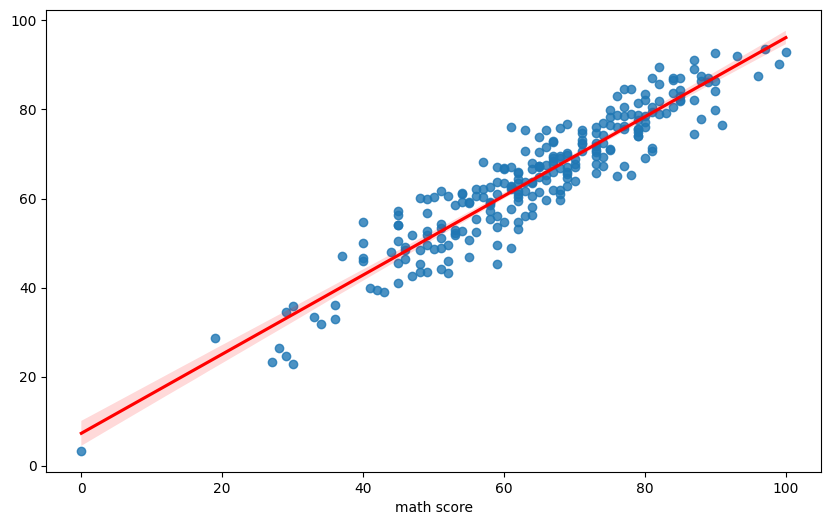

In [32]:
plt.figure(figsize=(10, 6))
sns.regplot(x=Y_test, y=y_test_pred, line_kws={"color": "red"})

In [33]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_test_pred,'Difference':Y_test-y_test_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.421875,14.578125
737,53,58.531250,-5.531250
740,80,77.234375,2.765625
660,74,76.984375,-2.984375
411,84,87.109375,-3.109375
...,...,...,...
109,70,63.890625,6.109375
430,64,63.375000,0.625000
77,80,83.500000,-3.500000
84,42,39.546875,2.453125
